## CK+48 dataset


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2 # importing os for interaction with  Operating system and open cv library for computer vision
import matplotlib.pyplot as plt # import the pyplot module from the Matplotlib library for plotting
import matplotlib.image as mpimg # Import the image module from Matplotlib for loading and displaying images
from pylab import rcParams # # Import the rcParams object from PyLab for setting the figure size
rcParams['figure.figsize'] = 20, 10 # Set the default figure size to 20x10 inches


from sklearn.utils import shuffle  # Import the shuffle function from scikit-learn for shuffling arrays
from sklearn.model_selection import train_test_split  # Import the train_test_split function from scikit-learn for splitting data into training and testing sets


In [2]:
pip install sklearn.cross_validation

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [3]:
import keras

from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential # adding the library which are useful for Convolution network
from keras.layers import Dense , Activation , Dropout ,Flatten 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization 
import os
print(os.listdir("G:/ml/CK+48")) # printing the class inside the CK+48


['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


In [4]:
                                      #the code is taken from kaggle 
                   #Source_01: https://www.kaggle.com/code/shawon10/ck-facial-expression-detection

data_path = 'G:/ml/CK+48'# Set the path to the directory containing the image data
data_dir_list = os.listdir(data_path) # Get the list of directories in the data path

img_rows=256 # Setting the number of rows for the resized images
img_cols=256 # Setting the number of rows for the resized images
num_channel=1 ## Set the number of rows for the resized images

num_epoch=10 

img_data_list=[]# Create an empty list to hold the image data



# Loop through each directory in the data path
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset) # Get the list of images in the current directory
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    count=0 
    # Loop through each image in the current directory
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )# Load the current image using OpenCV
        count+=1
        
        input_img_resize=cv2.resize(input_img,(48,48))# Resize the image to the desired dimensions
        img_data_list.append(input_img_resize)# # Add the resized image to the list
    print('no of images of dataset-'+'{},{}\n'.format(dataset,count)) #
        
img_data = np.array(img_data_list)# Convert the image data list to a NumPy array
img_data = img_data.astype('float32')
img_data = img_data/255 # Normalize the image data by dividing by 255
img_data.shape  # Print the shape of the image data array

Loaded the images of dataset-anger

no of images of dataset-anger,135

Loaded the images of dataset-contempt

no of images of dataset-contempt,54

Loaded the images of dataset-disgust

no of images of dataset-disgust,177

Loaded the images of dataset-fear

no of images of dataset-fear,75

Loaded the images of dataset-happy

no of images of dataset-happy,207

Loaded the images of dataset-sadness

no of images of dataset-sadness,84

Loaded the images of dataset-surprise

no of images of dataset-surprise,249



(981, 48, 48, 3)

In [5]:
                               #Source_02: https://www.kaggle.com/code/shawon10/ck-facial-expression-detection

num_classes = 7 # Define the number of classes

num_of_samples = img_data.shape[0] # Count the number of samples in the dataset
labels = np.ones((num_of_samples,),dtype='int64') # Create an array to store the labels for each sample

# Assign labels to the samples based on their index
labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

# Define a list of class names
names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

# Define a function to get the label name for a given ID
def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [6]:

#source_03 : https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/

Y = np_utils.to_categorical(labels, num_classes)# Convert the labels to encoding format

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

x_test=X_test # Assign the testing features to a separate variable

In [7]:
   #Reference for the code: https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

input_shape=(48,48,3) # Define the input shape of the model

model = Sequential() # Create a sequential model

# Add a convolutional layer with 6 filters, a kernel size of 5x5, and ReLU activation
model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Add a max pooling layer with a pool size of 2x2

#convolutional layer with 16 filters, a kernel size of 5x5, and ReLU activation
model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))

model.add(Activation('relu'))# Add another ReLU activation
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters, a kernel size of 3x3, and ReLU activation
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))# max pooling layer with a pool size of 2x2


model.add(Flatten()) # Flatten the output from the convolutional layers
model.add(Dense(128, activation = 'relu')) # Add a fully connected layer with 128 units and ReLU activation
model.add(Dropout(0.5)) # Add a dropout layer with a rate of 0.5
model.add(Dense(7, activation = 'softmax'))  #fully connected layer with 7 units (one for each class) and softmax activation

# Compile the model with categorical crossentropy loss, accuracy metric, and Adam optimizer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [8]:
#Reference: https://www.tutorialspoint.com/keras/keras_dense_layer.htm

model.summary() # Print a summary of the model architecture
model.get_config() # Get the configuration of the model
model.layers[0].get_config()# Get the configuration of the first layer in the model
model.layers[0].input_shape # Get the input shape 
model.layers[0].output_shape # Get the output shape 
model.layers[0].get_weights() # Get the weights 
np.shape(model.layers[0].get_weights()[0]) # Get the shape of the weights of the first layer in the model
model.layers[0].trainable # Check if the first layer in the model is trainable

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 activation (Activation)     (None, 24, 24, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        9

True

In [12]:
from keras import callbacks # importing the callbacks module from the Keras library.

filename='model_train_new.csv' # Set the filename for the CSV logger

# Set the filepath for the model checkpoint to save the best model weights during training
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5" 

# Create a CSV logger that will log the training process to the specified filename
csv_log=callbacks.CSVLogger(filename, separator=',', append=False) 

#Create a model checkpoint that will save the best model weights based on the validation loss
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Create a list of callbacks to be passed to the model training process, including both the CSV logger and the model checkpoint
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]# Create a list of callbacks to be passed to the model training process, containing only the CSV logger.
# This line overrides the previous line, so only the CSV logger will be used.

In [13]:
# Train the model using the fit method, passing in the training data (X_train and y_train), batch size, number of epochs, verbose level, validation data, and list of callbacks.
# The fit method returns a history object that contains information about the training process.

hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Epoch 1/50
119/119 [==============================] - 3s 14ms/step - loss: 1.7391 - accuracy: 0.3577 - val_loss: 1.0934 - val_accuracy: 0.5878
Epoch 2/50
119/119 [==============================] - 1s 12ms/step - loss: 1.0889 - accuracy: 0.6038 - val_loss: 0.7410 - val_accuracy: 0.7500
Epoch 3/50
119/119 [==============================] - 1s 12ms/step - loss: 0.7753 - accuracy: 0.7071 - val_loss: 0.4899 - val_accuracy: 0.8378
Epoch 4/50
119/119 [==============================] - 2s 15ms/step - loss: 0.6075 - accuracy: 0.7755 - val_loss: 0.3216 - val_accuracy: 0.9122
Epoch 5/50
119/119 [==============================] - 1s 12ms/step - loss: 0.4974 - accuracy: 0.8295 - val_loss: 0.2695 - val_accuracy: 0.9324
Epoch 6/50
119/119 [==============================] - 1s 12ms/step - loss: 0.4362 - accuracy: 0.8523 - val_loss: 0.2115 - val_accuracy: 0.9595
Epoch 7/50
119/119 [==============================] - 2s 18ms/step - loss: 0.3227 - accuracy: 0.8908 - val_loss: 0.1539 - val_accuracy: 0.9527

Test Loss: 0.020635735243558884
Test accuracy: 0.9864864945411682
(1, 48, 48, 3)
1/1 [==============================] - 0s 152ms/step
[[9.9995816e-01 4.7142034e-06 2.3390730e-07 5.8686719e-08 6.9308565e-12
  3.6813566e-05 5.5133360e-09]]
5/5 [==============================] - 0s 10ms/step
[0 2 6 6 2 2 6 6 4 2 2 2 4 4 5 6 1 6 4 2 2 6 6 4 2 4 6 0 5 3 2 5 6 3 4 2 2
 3 0 5 5 6 6 2 4 0 6 6 6 6 6 0 6 2 1 6 0 6 4 3 4 6 4 6 4 2 2 6 4 4 5 5 3 6
 2 2 2 0 6 6 4 1 6 0 0 6 6 6 5 4 4 0 0 1 6 0 6 1 6 1 6 0 2 6 5 0 3 0 2 4 6
 6 2 0 6 6 0 0 0 2 6 2 2 2 4 4 6 3 2 6 3 2 1 4 6 2 4 2 4 6 2 6 1 3 6 5 6 2]
[[1. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 22ms/step


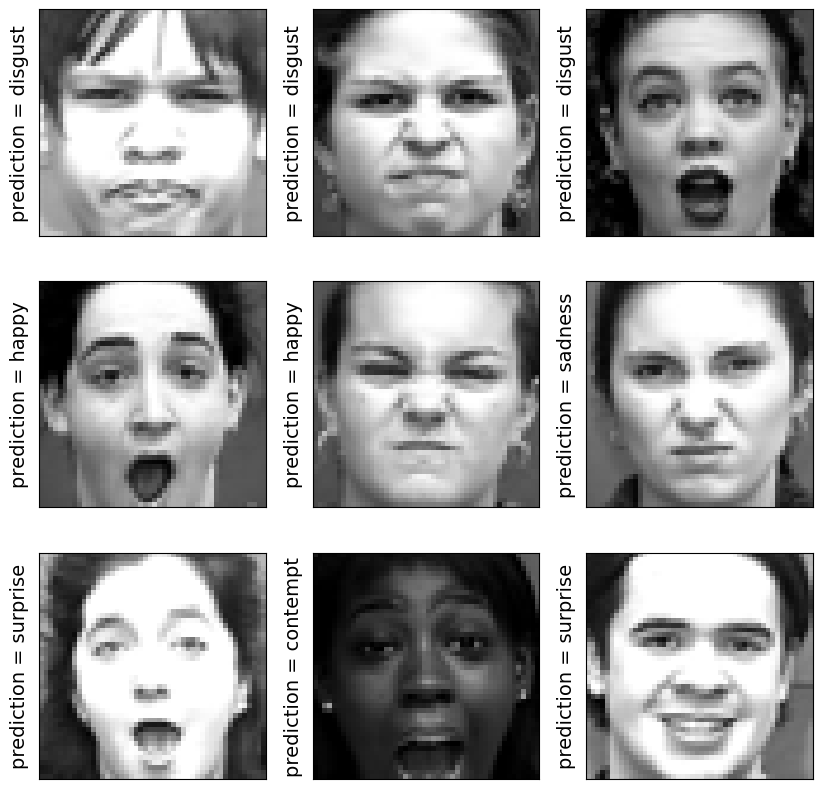

In [14]:
                       #Source : https://www.kaggle.com/code/shawon10/ck-facial-expression-detection

# Evaluate the model on the test set and print the loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

# Select a single image from the test set and print its shape
test_image = X_test[0:1]
print (test_image.shape)

# Use the trained model to predict the label of the selected image
print(model.predict(test_image))

# Use the trained model to predict the labels for all images in the test set
print(np.argmax(model.predict(x_test), axis=-1))
print(y_test[0:1]) # Print the actual label of the selected image from the test set

# Use the trained model to predict the labels for a subset of the test set and visualize the results
res = np.argmax(model.predict(X_test[9:18]), axis=-1)
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
    
    
plt.show( )# show the plot

<Figure size 2000x1000 with 0 Axes>

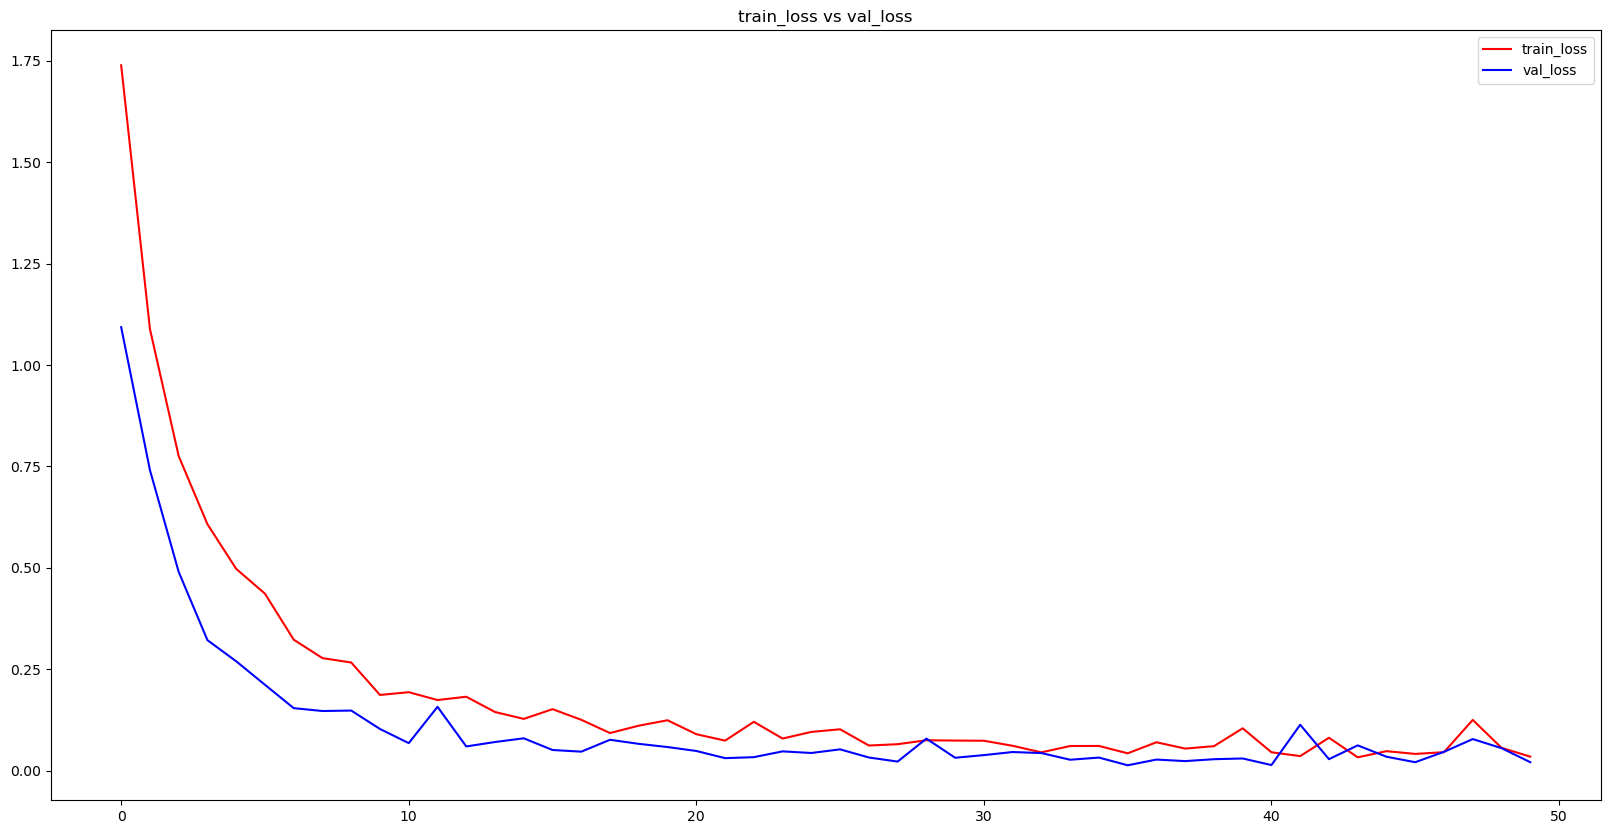

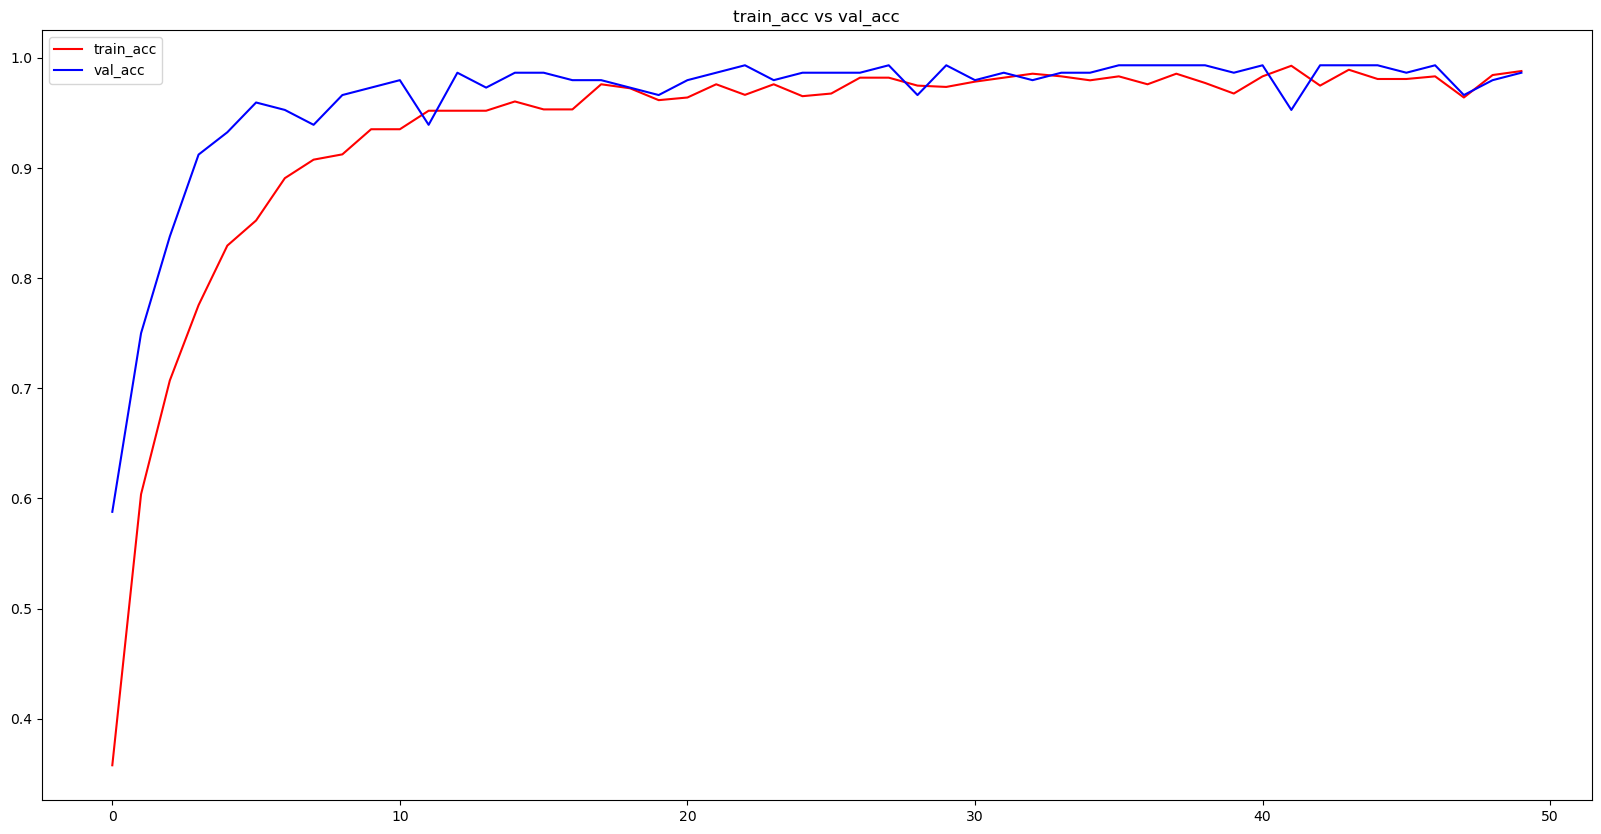

<Figure size 2000x1000 with 0 Axes>

In [15]:
                   # Source: https://www.kaggle.com/code/shawon10/ck-facial-expression-detection

                                     # visualizing losses and accuracy

# a magic command to display plots inline
%matplotlib inline

# Extract the training and validation loss and accuracy values from the `hist` object
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc)) # Create an array of epochs for the x-axis of the plot

# Plot the training and validation loss values against the number of epochs
plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure() # Create next plot

# Plot the training and validation accuracy values against the number of epochs
plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()# Create next plot

## FER 2013

Code adopted and modified from the source: https://www.kaggle.com/code/mohamedchahed/human-emotion-detection
                                           https://github.com/pytorch/vision/blob/main/torchvision/datasets/folder.py

In [21]:
print(os.listdir("G:/ml/FER_2013/train")) #print list of variables in the directory

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [22]:
data_path = 'G:/ml/FER_2013/train' # Set the path to the directory containing the image datasets
data_dir_list = os.listdir(data_path) # creat list of all the directories in the data path

# Set the image dimensions and number of channels
img_rows=256
img_cols=256
num_channel=1

num_epoch=10  # Set the number of epochs to train the model

img_data_list=[] # Create an empty list to store the image data

# Loop over all the directories in the data path

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)  # List all the image files in the directory
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    count=0  # Count the number of images in the directory
    
    # Loop over all the images in the directory
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )  # Read the image file into a numpy array
        count+=1
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48)) # Resize the image to the desired dimensions
        img_data_list.append(input_img_resize)         # Add the resized image to the list of image data
    print('no of images of dataset-'+'{},{}\n'.format(dataset,count)) # Print the number of images loaded for this dataset
        
img_data = np.array(img_data_list) # Convert the list of image data to a numpy array
img_data = img_data.astype('float32') # Convert the image data to float32 type
img_data = img_data/255 # Normalize the image data to the range [0, 1]
img_data.shape  # Check for the shape of the image data array

Loaded the images of dataset-angry

no of images of dataset-angry,3995

Loaded the images of dataset-disgust

no of images of dataset-disgust,436

Loaded the images of dataset-fear

no of images of dataset-fear,4097

Loaded the images of dataset-happy

no of images of dataset-happy,7215

Loaded the images of dataset-neutral

no of images of dataset-neutral,4965

Loaded the images of dataset-sad

no of images of dataset-sad,4830

Loaded the images of dataset-surprise

no of images of dataset-surprise,3171



(28709, 48, 48, 3)

In [23]:
num_classes = 7 #Number of classes (emotions) in the dataset.

num_of_samples = img_data.shape[0] #Total number of images in the dataset.
labels = np.ones((num_of_samples,),dtype='int64') # Array to store the labels for each image.

#Assigning labels to each image based on their index range. 
labels[0:3995]=0 #135   #The comments is the number of images belonging to each class. 
labels[3996:4431]=1 #54
labels[4432:8528]=2 #177
labels[8529:15743]=3 #75
labels[15744:20708]=4 #207
labels[20709:25538]=5 #84
labels[25539:28709]=6 #249

#A list of emotion names corresponding to each class.
names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id): # A function to get the name of an emotion by passing its index.
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [24]:
Y_train = np_utils.to_categorical(labels, num_classes)  #converts the labels array to categorical labels

In [25]:
X_train,y_train = shuffle(img_data,Y_train, random_state=2) #shuffles the images and their corresponding labels randomly

## Test Dataset

In [26]:
print(os.listdir("G:/ml/FER_2013/test"))  # check for the varibales in the directory 

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [27]:
data_path = 'G:/ml/FER_2013/test' #Defining the path for the test dataset
data_dir_list = os.listdir(data_path) #Retrieving the list of directories present in the given path

#Defining the image size and number of channels
img_rows=256
img_cols=256
num_channel=1

num_epoch=10 #Defining the number of epochs for training the model

img_data_list_1=[] #Initializing an empty list to store the resized images

#Looping through each directory present in the data path

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset) # Retrieving the list of images present in the current directory
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))  # Printing a message indicating that the images have been loaded successfully
    count=0  # Initializing a count variable to keep track of the number of images in the directory
    
    # Looping through each image in the current directory
    for img in img_list:
        input_img_1=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        count+=1  # Incrementing the count variable
        
        # Resizing the image to the desired size
        input_img_resize_1=cv2.resize(input_img_1,(48,48))
        img_data_list_1.append(input_img_resize_1)  # Adding the resized image to the list of images
    print('no of images of dataset-'+'{},{}\n'.format(dataset,count))  # Printing a message indicating the number of images present in the directory

#Converting the list of images to a numpy array and performing normalization
img_data_test = np.array(img_data_list_1)
img_data_test = img_data_test.astype('float32')
img_data_test = img_data_test/255
img_data_test.shape #Check for the shape of the test data 

Loaded the images of dataset-angry

no of images of dataset-angry,958

Loaded the images of dataset-disgust

no of images of dataset-disgust,111

Loaded the images of dataset-fear

no of images of dataset-fear,1024

Loaded the images of dataset-happy

no of images of dataset-happy,1774

Loaded the images of dataset-neutral

no of images of dataset-neutral,1233

Loaded the images of dataset-sad

no of images of dataset-sad,1247

Loaded the images of dataset-surprise

no of images of dataset-surprise,831



(7178, 48, 48, 3)

In [28]:
num_classes = 7   #Number of classes (emotions) in the dataset.

num_of_samples1 = img_data_test.shape[0] #Total number of images in the dataset. 
labels1 = np.ones((num_of_samples1,),dtype='int64')  ## Array to store the labels for each image

#Assigning labels to each image based on their index range.
labels1[0:958]=0 #135  #The comments is the number of images belonging to each class
labels1[959:1069]=1 #54
labels1[1070:2093]=2 #177
labels1[2094:3867]=3 #75
labels1[3868:5100]=4 #207
labels1[5101:6347]=5 #84
labels1[6348:7178]=6 #249

#A list of emotion names corresponding to each class
names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel_test(id): # A function to get the name of an emotion by passing its index
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [29]:
Y_test = np_utils.to_categorical(labels1, num_classes) #converts the labels array to categorical labels

In [30]:
X_test,y_test = shuffle(img_data_test,Y_test, random_state=2) #shuffles the images and their corresponding labels randomly
x_test=X_test  # Assign the testing features to a separate variable

In [31]:

#trains the model using the fit method, with specified batch size, number of epochs, and validation data, and stores the training history in the variable 'hist', and by using callback functions for monitoring the model during training.

hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Epoch 1/50
4102/4102 [==============================] - 48s 12ms/step - loss: 1.8226 - accuracy: 0.2522 - val_loss: 1.8000 - val_accuracy: 0.2595
Epoch 2/50
4102/4102 [==============================] - 49s 12ms/step - loss: 1.7470 - accuracy: 0.2912 - val_loss: 1.6650 - val_accuracy: 0.3371
Epoch 3/50
4102/4102 [==============================] - 48s 12ms/step - loss: 1.6392 - accuracy: 0.3557 - val_loss: 1.5701 - val_accuracy: 0.3855
Epoch 4/50
4102/4102 [==============================] - 46s 11ms/step - loss: 1.5683 - accuracy: 0.3867 - val_loss: 1.5246 - val_accuracy: 0.4135
Epoch 5/50
4102/4102 [==============================] - 47s 11ms/step - loss: 1.5275 - accuracy: 0.4080 - val_loss: 1.5030 - val_accuracy: 0.4133
Epoch 6/50
4102/4102 [==============================] - 47s 11ms/step - loss: 1.4912 - accuracy: 0.4242 - val_loss: 1.4661 - val_accuracy: 0.4245
Epoch 7/50
4102/4102 [==============================] - 47s 11ms/step - loss: 1.4557 - accuracy: 0.4363 - val_loss: 1.4388 -

Test Loss: 1.9465904235839844
Test accuracy: 0.47701308131217957
(1, 48, 48, 3)
1/1 [==============================] - 0s 20ms/step
[[6.7999628e-03 1.8288631e-08 8.7924069e-03 9.4722879e-01 7.5895749e-03
  2.2691306e-02 6.8979948e-03]]
225/225 [==============================] - 2s 10ms/step
[3 0 4 ... 5 6 3]
[[0. 0. 0. 0. 1. 0. 0.]]
1/1 [==============================] - 0s 28ms/step


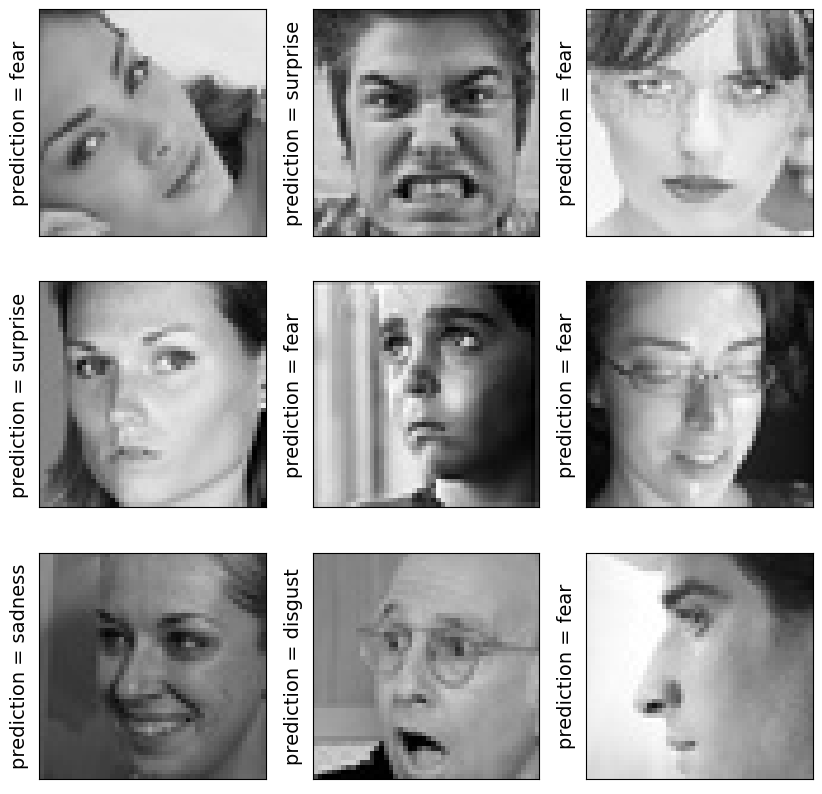

In [32]:
                      #Source: https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
                                        # evaluate the model on the test set and save the scores

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])     # print the test loss and accuracy scores
print('Test accuracy:', score[1])

# select the first test image and print its shape
test_image = X_test[0:1]
print (test_image.shape)

# predict the output for the first test image and print the result
print(model.predict(test_image))
print(np.argmax(model.predict(x_test), axis=-1))
print(y_test[0:1]) # print the true label of the first test image

# predict the output for all test images and print the index with maximum predicted probability
res = np.argmax(model.predict(X_test[9:18]), axis=-1)
plt.figure(figsize=(10, 10)) # create a new matplotlib figure with a size of 10 by 10 inches


# plot the first 9 test images in a 3x3 grid with predicted labels as y-labels
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
    
    # show the plot
plt.show()

<Figure size 2000x1000 with 0 Axes>

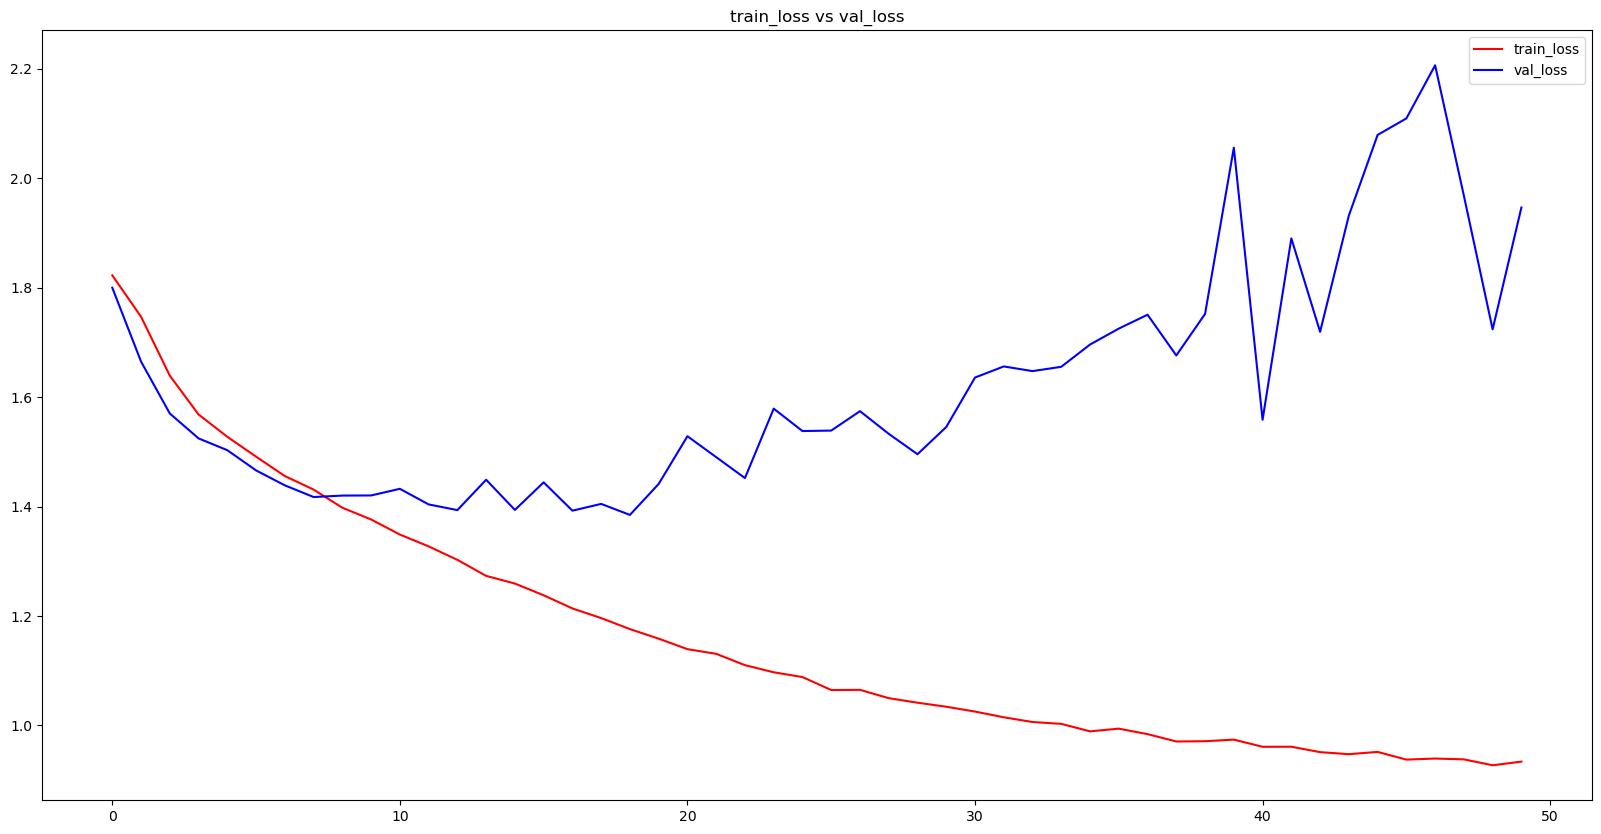

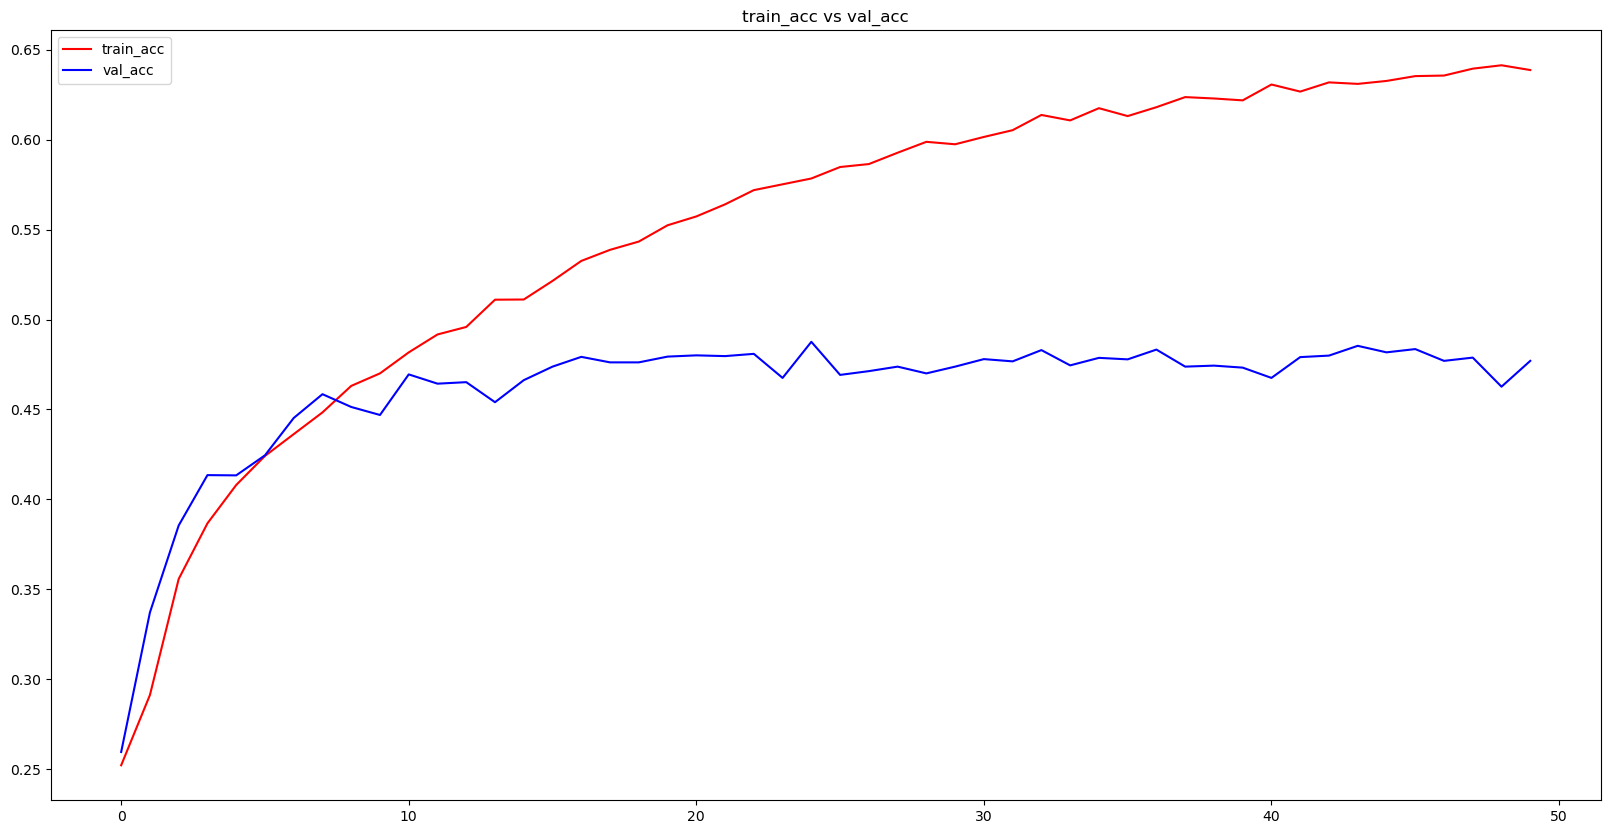

<Figure size 2000x1000 with 0 Axes>

In [33]:

             #Source: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
                                       #visualizing losses and accuracy

%matplotlib inline

# Extract the training and validation loss and accuracy scores from the history object
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc)) # Create a list of integers representing the number of epochs

# Create a figure with two subplots showing the training and validation loss over epochs
plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

# Create a figure with two subplots showing the training and validation accuracy over epochs
plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

## Resnet Model

In [34]:
# Import necessary modules and classes from TensorFlow Keras library

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D #  for a pooling layer that averages the values across the height and width dimensions of each feature map
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for generating batches of tensor image data with real-time data augmentation.
from tensorflow.keras.applications.resnet50 import ResNet50  #A pre-trained convolutional neural network model
from tensorflow.keras.models import Model  #for creating a Keras model 

In [35]:
                              # Code is generated by using ChatGPT4 (https://chat.openai.com/)

# Define image dimensions
img_rows=48
img_cols=48
num_channel=3

# Define batch size and number of epochs
batch_size = 32
num_epochs = 10

# Set the path to your training data
train_data_path = 'G:/ml/FER_2013/train'

# Set the path to your validation data
validation_data_path = 'G:/ml/FER_2013/test'

# Preprocess the training data
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_data_gen.flow_from_directory(train_data_path, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')

# Preprocess the validation data
validation_data_gen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_data_gen.flow_from_directory(validation_data_path, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')

# Load the ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, num_channel))

# Add a global average pooling layer and a dense output layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model so they are not trained
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=num_epochs, validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

# Save the model
model.save('resnet_model.h5')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/10
897/897 [==============================] - 177s 194ms/step - loss: 1.8198 - accuracy: 0.2430 - val_loss: 1.7682 - val_accuracy: 0.2836
Epoch 2/10
897/897 [==============================] - 164s 183ms/step - loss: 1.7761 - accuracy: 0.2615 - val_loss: 1.7477 - val_accuracy: 0.2744
Epoch 3/10
897/897 [==============================] - 168s 188ms/step - loss: 1.7546 - accuracy: 0.2778 - val_loss: 1.8231 - val_accuracy: 0.2383
Epoch 4/10
897/897 [==============================] - 174s 193ms/step - loss: 1.7402 - accuracy: 0.2862 - val_loss: 1.7194 - val_accuracy: 0.3079
Epoch 5/10
897/897 [==============================] - 166s 185ms/step - loss: 1.7257 - accuracy: 0.2936 - val_loss: 1.7093 - val_accuracy: 0.2951
Epoch 6/10
897/897 [==============================] - 168s 187ms/step - loss: 1.7195 - accuracy: 0.2976 - val_loss: 1.7058 - val_accuracy: 0.3051
Epoch 7/10
897/897 [===================

Epoch 1/10
897/897 [==============================] - 166s 185ms/step - loss: 1.6882 - accuracy: 0.3198 - val_loss: 1.7116 - val_accuracy: 0.3092
Epoch 2/10
897/897 [==============================] - 166s 185ms/step - loss: 1.6870 - accuracy: 0.3207 - val_loss: 1.6900 - val_accuracy: 0.3198
Epoch 3/10
897/897 [==============================] - 170s 190ms/step - loss: 1.6842 - accuracy: 0.3215 - val_loss: 1.6703 - val_accuracy: 0.3421
Epoch 4/10
897/897 [==============================] - 163s 182ms/step - loss: 1.6843 - accuracy: 0.3229 - val_loss: 1.6698 - val_accuracy: 0.3362
Epoch 5/10
897/897 [==============================] - 176s 197ms/step - loss: 1.6785 - accuracy: 0.3257 - val_loss: 1.6581 - val_accuracy: 0.3382
Epoch 6/10
897/897 [==============================] - 180s 201ms/step - loss: 1.6754 - accuracy: 0.3282 - val_loss: 1.6712 - val_accuracy: 0.3364
Epoch 7/10
897/897 [==============================] - 171s 190ms/step - loss: 1.6760 - accuracy: 0.3289 - val_loss: 1.6550 -

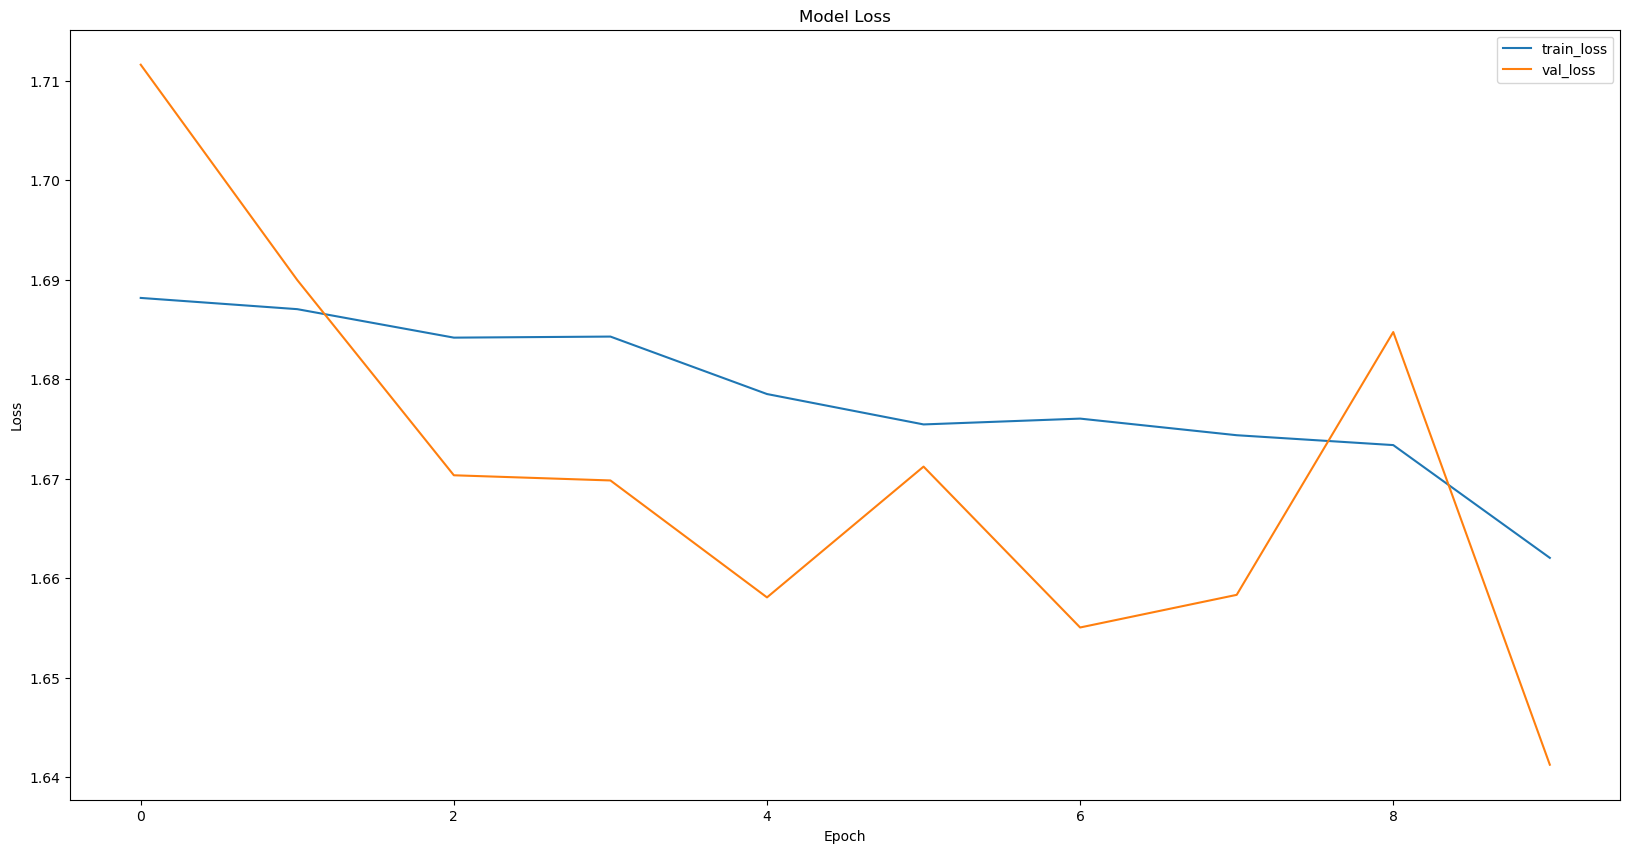

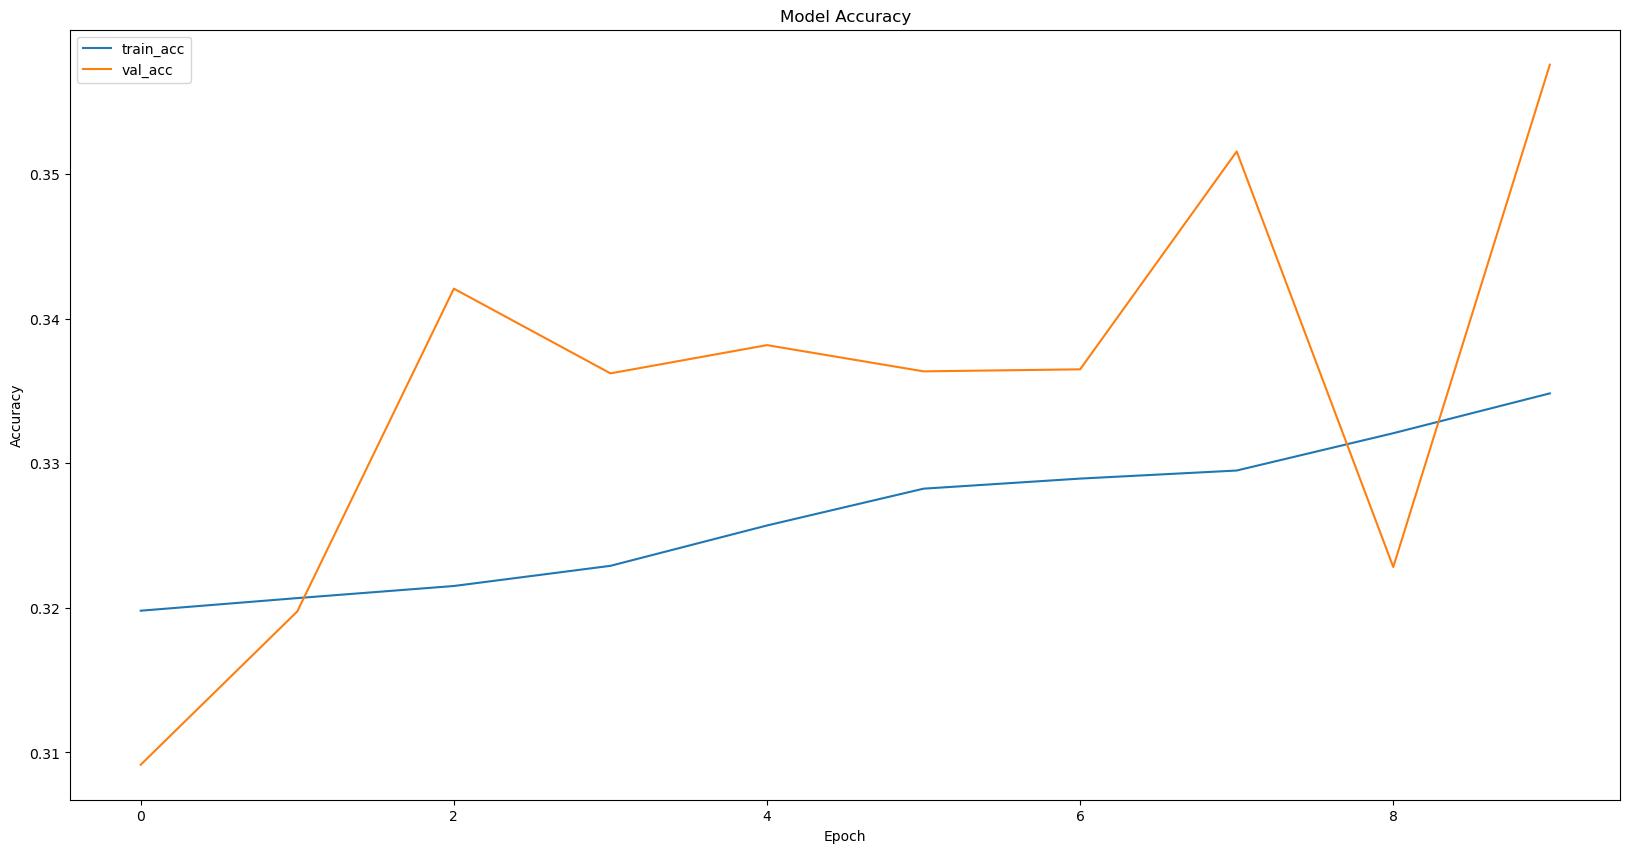

In [36]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=num_epochs, validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

225/225 [==============================] - 30s 128ms/step


<AxesSubplot:>

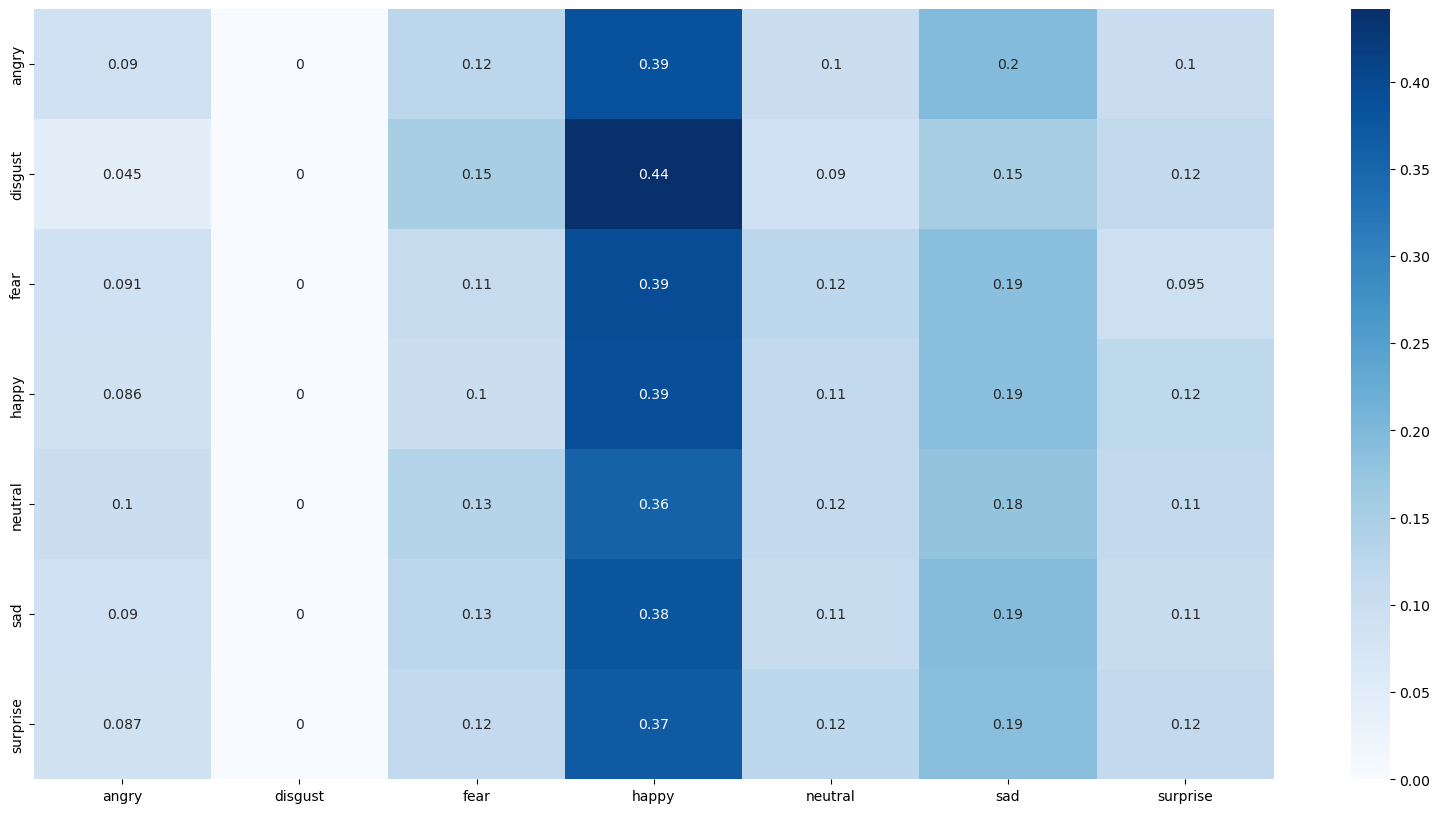

In [37]:
#Source: https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predictions for the validation set
y_pred = model.predict(validation_generator)

# Get the predicted labels
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Get the class names
class_names = list(validation_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)


## Resnet + Convolution network

In [1]:
#Import imporatnt libraries 
#Conv2D creates a convolutional layer for 2D image data
#MaxPooling2D creates a max pooling layer for 2D image data
#Dropout creates a dropout layer that randomly drops out a fraction of the input units during training

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [39]:
import os
import cv2
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Set the path to your training data
train_data_path = 'G:/ml/FER_2013/train'

# Define image dimensions
img_rows = 48
img_cols = 48
num_channels = 3

# Define batch size and number of epochs
batch_size = 32
num_epochs = 10

# Set the path to your validation data
validation_data_path = 'G:/ml/FER_2013/test'

# Define the input shape
input_shape = (img_rows, img_cols, num_channels)

# Create the input layer
inputs = Input(shape=input_shape)

# Add the first convolutional layer
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)

# Add the second convolutional layer
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# Add the third convolutional layer
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Flatten the output of the third convolutional layer
x = Flatten()(x)

# Add a dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add the output layer with 7 neurons
predictions = Dense(7, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess the training data
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_data_gen.flow_from_directory(train_data_path, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')

# Preprocess the validation data
validation_data_gen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_data_gen.flow_from_directory(validation_data_path, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')

# Train the model
history1=model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=num_epochs, validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

# Save the model
model.save('cnn_model.h5')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/10
897/897 [==============================] - 818s 910ms/step - loss: 1.7459 - accuracy: 0.3229 - val_loss: 1.5337 - val_accuracy: 0.4019
Epoch 2/10
897/897 [==============================] - 816s 909ms/step - loss: 1.5057 - accuracy: 0.4177 - val_loss: 1.3982 - val_accuracy: 0.4579
Epoch 3/10
897/897 [==============================] - 822s 916ms/step - loss: 1.4091 - accuracy: 0.4505 - val_loss: 1.3420 - val_accuracy: 0.4784
Epoch 4/10
897/897 [==============================] - 814s 907ms/step - loss: 1.3497 - accuracy: 0.4794 - val_loss: 1.3232 - val_accuracy: 0.4856
Epoch 5/10
897/897 [==============================] - 816s 910ms/step - loss: 1.3127 - accuracy: 0.4927 - val_loss: 1.2894 - val_accuracy: 0.5039
Epoch 6/10
897/897 [==============================] - 892s 995ms/step - loss: 1.2701 - accuracy: 0.5105 - val_loss: 1.2872 - val_accuracy: 0.5029
Epoch 7/10
897/897 [===================

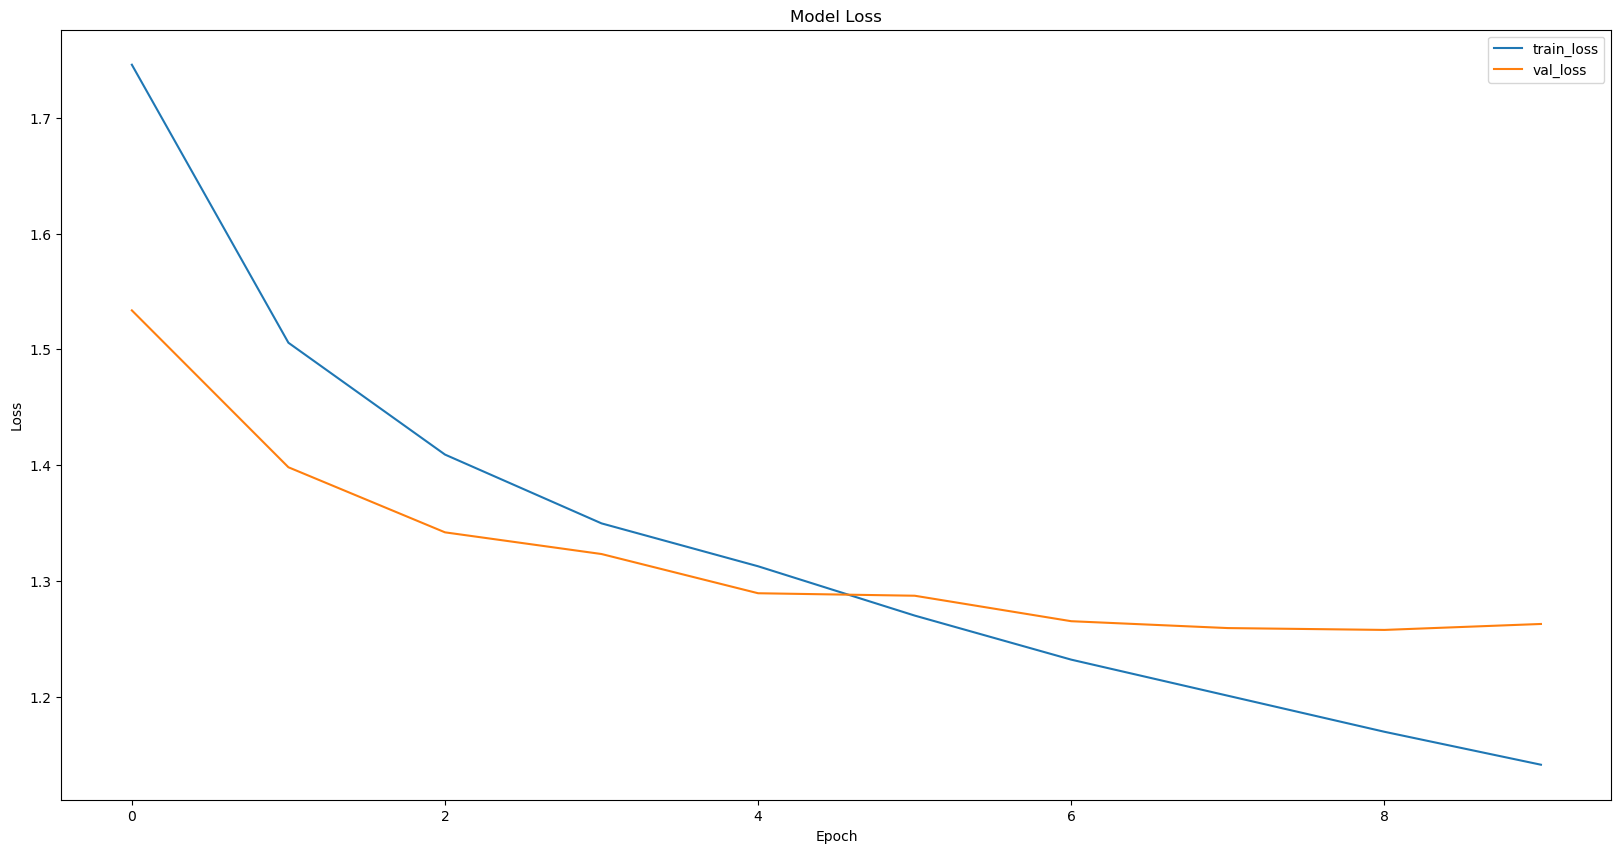

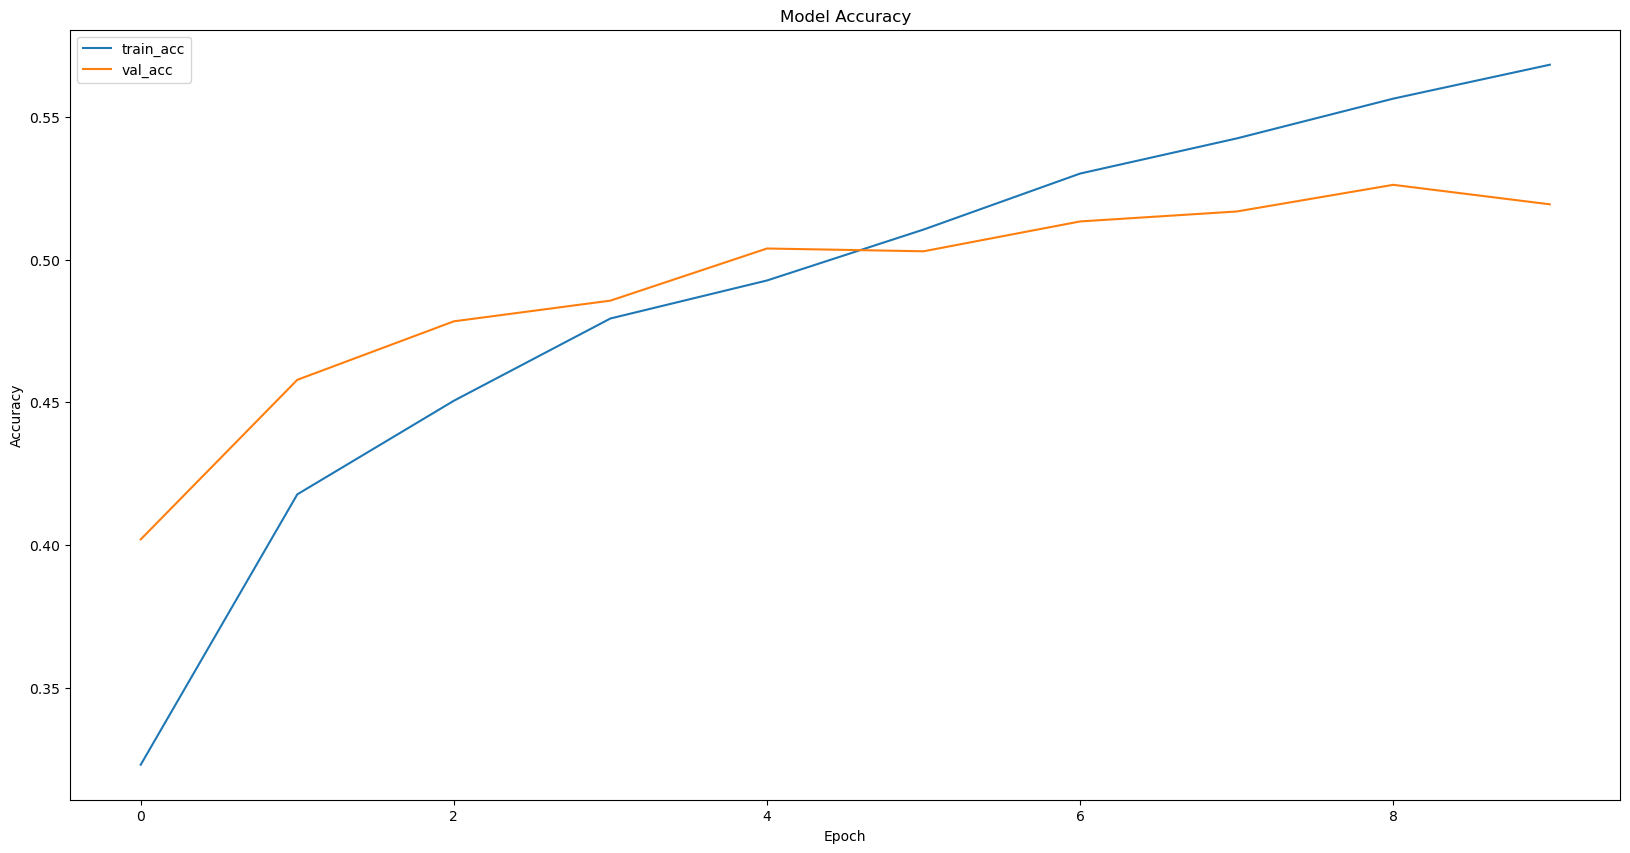

In [42]:
import matplotlib.pyplot as plt


# Plot the training and validation loss
plt.plot(history1.history['loss'], label='train_loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history1.history['accuracy'], label='train_acc')
plt.plot(history1.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

225/225 [==============================] - 27s 120ms/step


<AxesSubplot:>

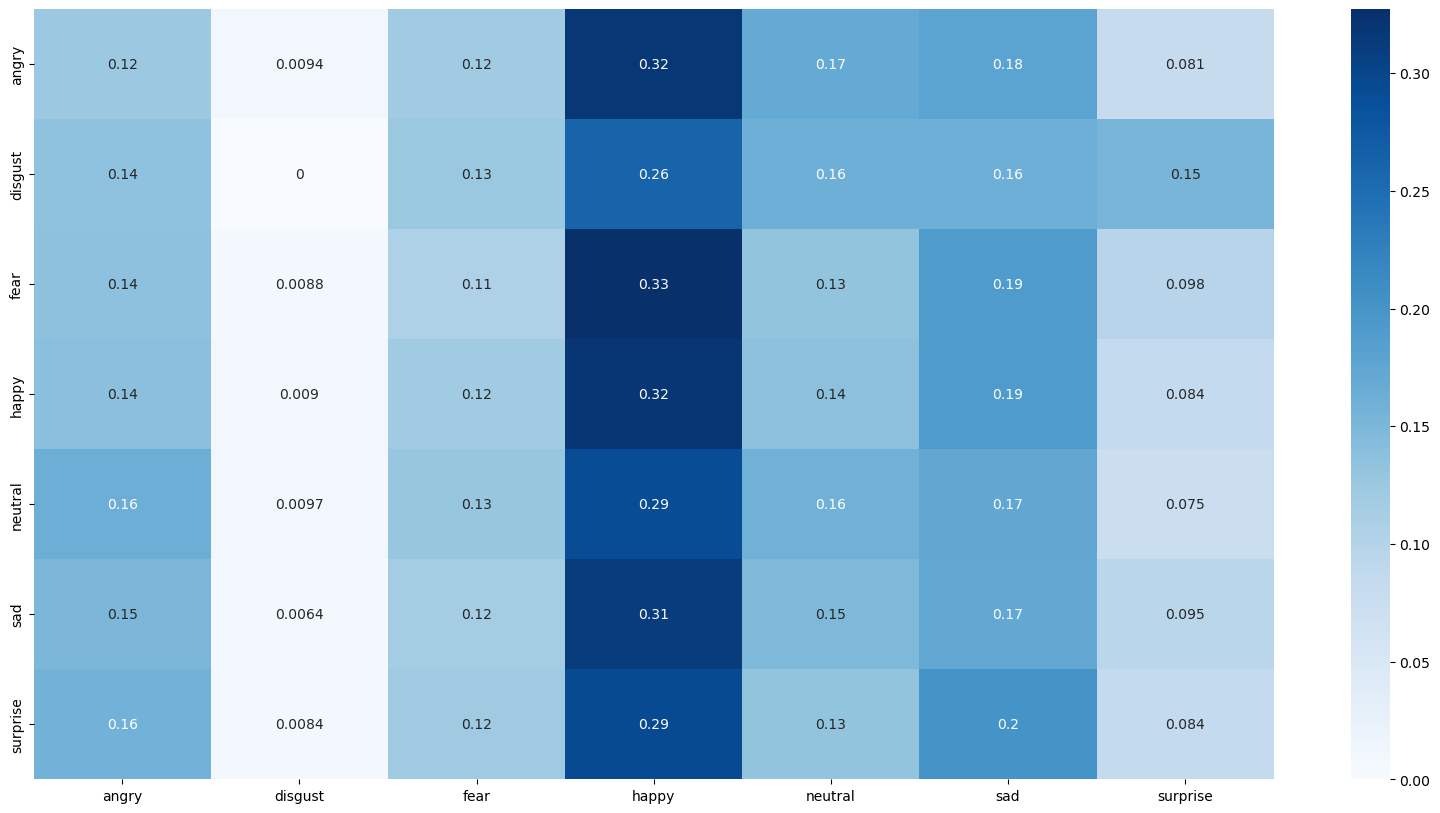

In [43]:
from sklearn.metrics import confusion_matrix  # The matrix shows the number of true positive, false positive, true negative, and false negative predictions made by the classifier
import seaborn as sns # to create a heatmap visualization of the confusion matrix

# Get the predictions for the validation set
y_pred = model.predict(validation_generator)

# Get the predicted labels
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Get the class names
class_names = list(validation_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

## Inception +CNN

In [44]:
from tensorflow.keras.layers import  concatenate #to merge the outputs of multiple layers in a neural network
from tensorflow.keras.models import Model #to create a Keras model by specifying the input and output layers
from tensorflow.keras.applications.inception_v3 import InceptionV3 #a pre-trained convolutional neural network architecture that was trained on the ImageNet dataset

In [46]:
#Source: https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/

import os
import cv2
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Set the path to your training data
train_data_path = 'G:/ml/FER_2013/train'

# Define image dimensions
img_rows = 75
img_cols = 75
num_channels = 3

# Define batch size and number of epochs
batch_size = 32
num_epochs = 10

# Set the path to your validation data
validation_data_path = 'G:/ml/FER_2013/test'

# Load the InceptionV3 model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, num_channels))

# Freeze all the layers in the InceptionV3 model
for layer in inception_model.layers:
    layer.trainable = False

# Get the output of the InceptionV3 model
x = inception_model.output

# Add the first convolutional layer
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

# Add the second convolutional layer
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# Add the third convolutional layer
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Flatten the output of the third convolutional layer
x = Flatten()(x)

# Add a dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add the output layer with 7 neurons
predictions = Dense(7, activation='softmax')(x)

# Create the model
model = Model(inputs=inception_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess the training data
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_data_gen.flow_from_directory(train_data_path, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')

# Preprocess the validation data
validation_data_gen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_data_gen.flow_from_directory(validation_data_path, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')

# Train the model
history2=model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=num_epochs, validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

# Save the model
model.save('inception_cnn_model.h5')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/10
897/897 [==============================] - 142s 153ms/step - loss: 1.6579 - accuracy: 0.3448 - val_loss: 1.5910 - val_accuracy: 0.3809
Epoch 2/10
897/897 [==============================] - 124s 138ms/step - loss: 1.5853 - accuracy: 0.3861 - val_loss: 1.5548 - val_accuracy: 0.3936
Epoch 3/10
897/897 [==============================] - 122s 136ms/step - loss: 1.5627 - accuracy: 0.3949 - val_loss: 1.5691 - val_accuracy: 0.3896
Epoch 4/10
897/897 [==============================] - 124s 138ms/step - loss: 1.5488 - accuracy: 0.4013 - val_loss: 1.5701 - val_accuracy: 0.3966
Epoch 5/10
897/897 [==============================] - 132s 147ms/step - loss: 1.5324 - accuracy: 0.4071 - val_loss: 1.5421 - val_accuracy: 0.4021
Epoch 6/10
897/897 [==============================] - 124s 138ms/step - loss: 1.5216 - accuracy: 0.4089 - val_loss: 1.5338 - val_accuracy: 0.4049
Epoch 7/10
897/897 [===================

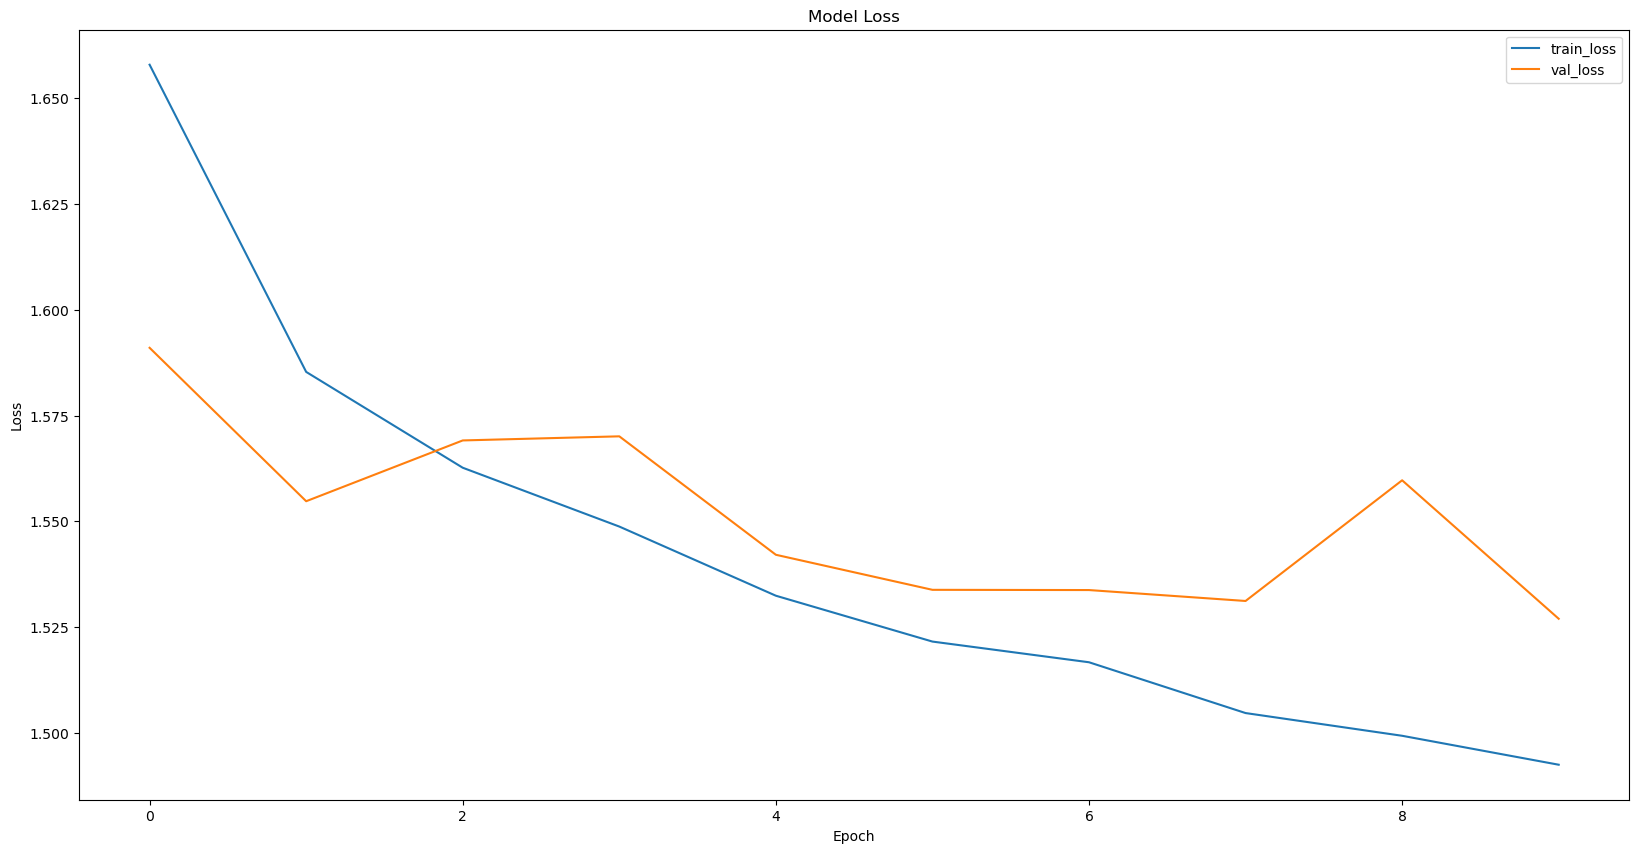

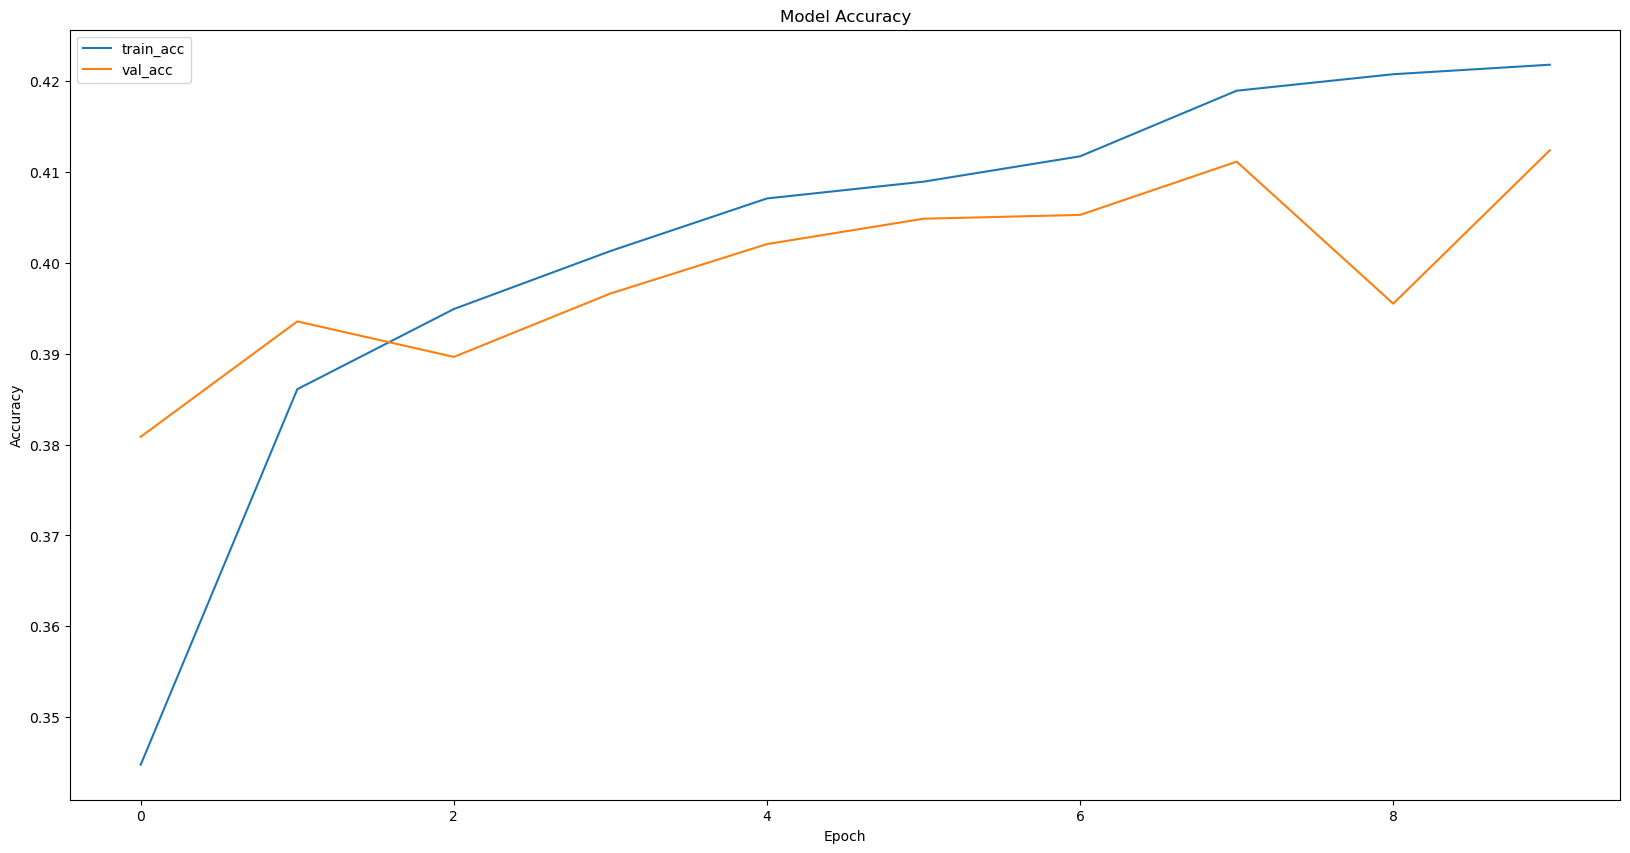

In [53]:
# Plot the training and validation loss
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history2.history['accuracy'], label='train_acc')
plt.plot(history2.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

225/225 [==============================] - 57s 252ms/step


<AxesSubplot:>

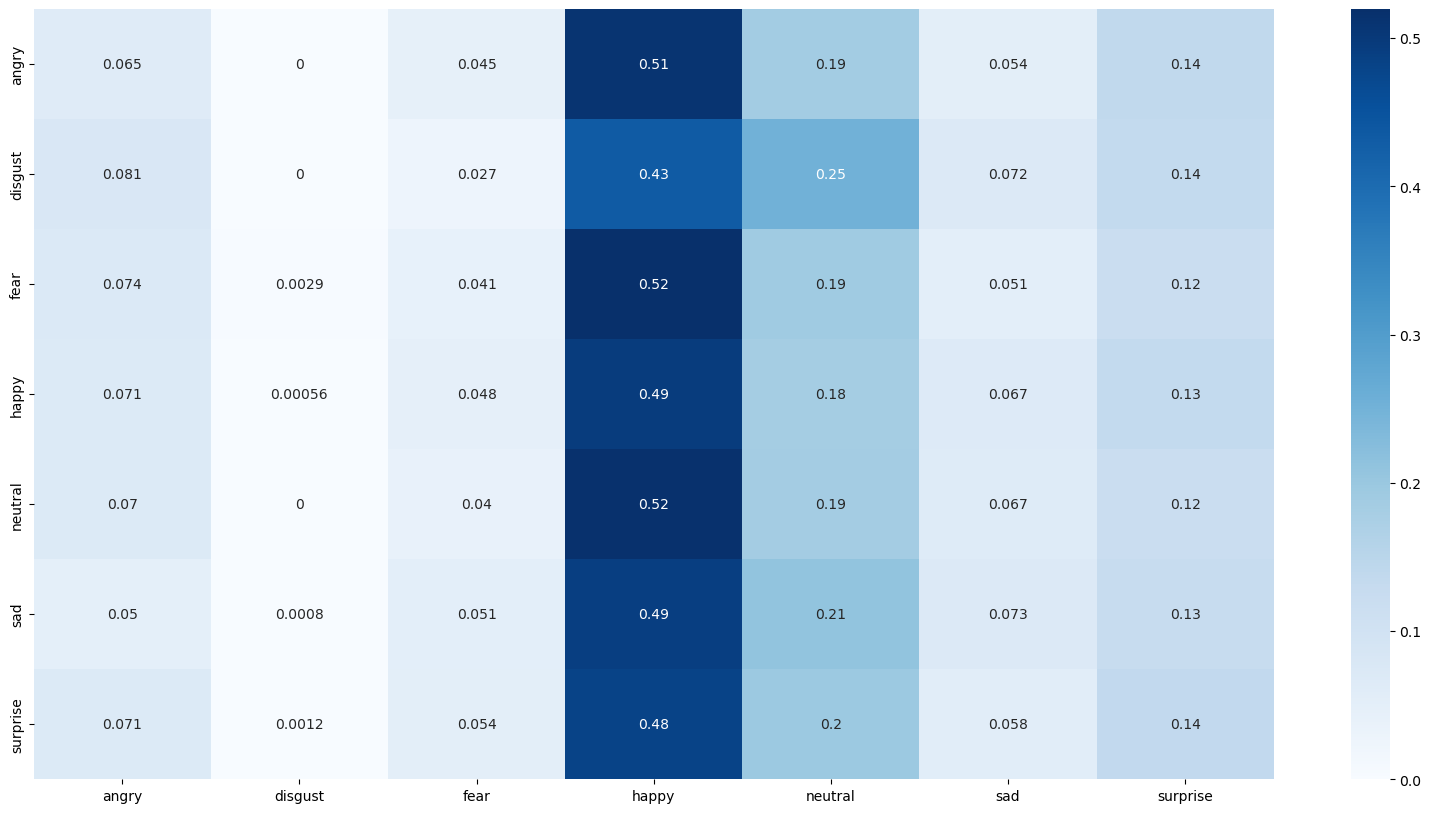

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predictions for the validation set
y_pred = model.predict(validation_generator)

# Get the predicted labels
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Get the class names
class_names = list(validation_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

## VGG 19 + convolution network

In [48]:
 #Source: https://www.kaggle.com/code/enesztrk/facial-emotion-recognition-vgg19-fer2013
 #Source: ChatCPT4

from tensorflow.keras.applications.vgg19 import VGG19 #a deep convolutional neural network architecture, trained on the ImageNet dataset

# Set the path to your training data
train_data_path = 'G:/ml/FER_2013/train'

# Define image dimensions
img_rows = 48
img_cols = 48
num_channels = 3

# Define batch size and number of epochs
batch_size = 32
num_epochs = 10

# Set the path to your validation data
validation_data_path = 'G:/ml/FER_2013/test'

# Define the input shape
input_shape = (img_rows, img_cols, num_channels)

# Load the VGG19 model (without the fully connected layers)
vgg_model = VGG19(include_top=False, input_shape=input_shape)

# Freeze the weights of the VGG19 layers
for layer in vgg_model.layers:
    layer.trainable = False

# Create the input layer
inputs = Input(shape=input_shape)

# Add the VGG19 layers
x = vgg_model(inputs)

# Add the convolutional layer
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)

# Flatten the output of the convolutional layer
x = Flatten()(x)

# Add a dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add the output layer with 7 neurons
predictions = Dense(7, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess the training data
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_data_gen.flow_from_directory(train_data_path, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')

# Preprocess the validation data
validation_data_gen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_data_gen.flow_from_directory(validation_data_path, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')

# Train the model
history3=model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=num_epochs, validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

# Save the model
model.save('vgg19_cnn_model.h5')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/10
897/897 [==============================] - 298s 331ms/step - loss: 1.6865 - accuracy: 0.3235 - val_loss: 1.6153 - val_accuracy: 0.3563
Epoch 2/10
897/897 [==============================] - 304s 339ms/step - loss: 1.6375 - accuracy: 0.3479 - val_loss: 1.5924 - val_accuracy: 0.3670
Epoch 3/10
897/897 [==============================] - 308s 343ms/step - loss: 1.6125 - accuracy: 0.3604 - val_loss: 1.5870 - val_accuracy: 0.3651
Epoch 4/10
897/897 [==============================] - 311s 347ms/step - loss: 1.5940 - accuracy: 0.3722 - val_loss: 1.5602 - val_accuracy: 0.3881
Epoch 5/10
897/897 [==============================] - 312s 348ms/step - loss: 1.5793 - accuracy: 0.3792 - val_loss: 1.5555 - val_accuracy: 0.3827
Epoch 6/10
897/897 [==============================] - 1433s 2s/step - loss: 1.5679 - accuracy: 0.3822 - val_loss: 1.5571 - val_accuracy: 0.3843
Epoch 7/10
897/897 [=====================

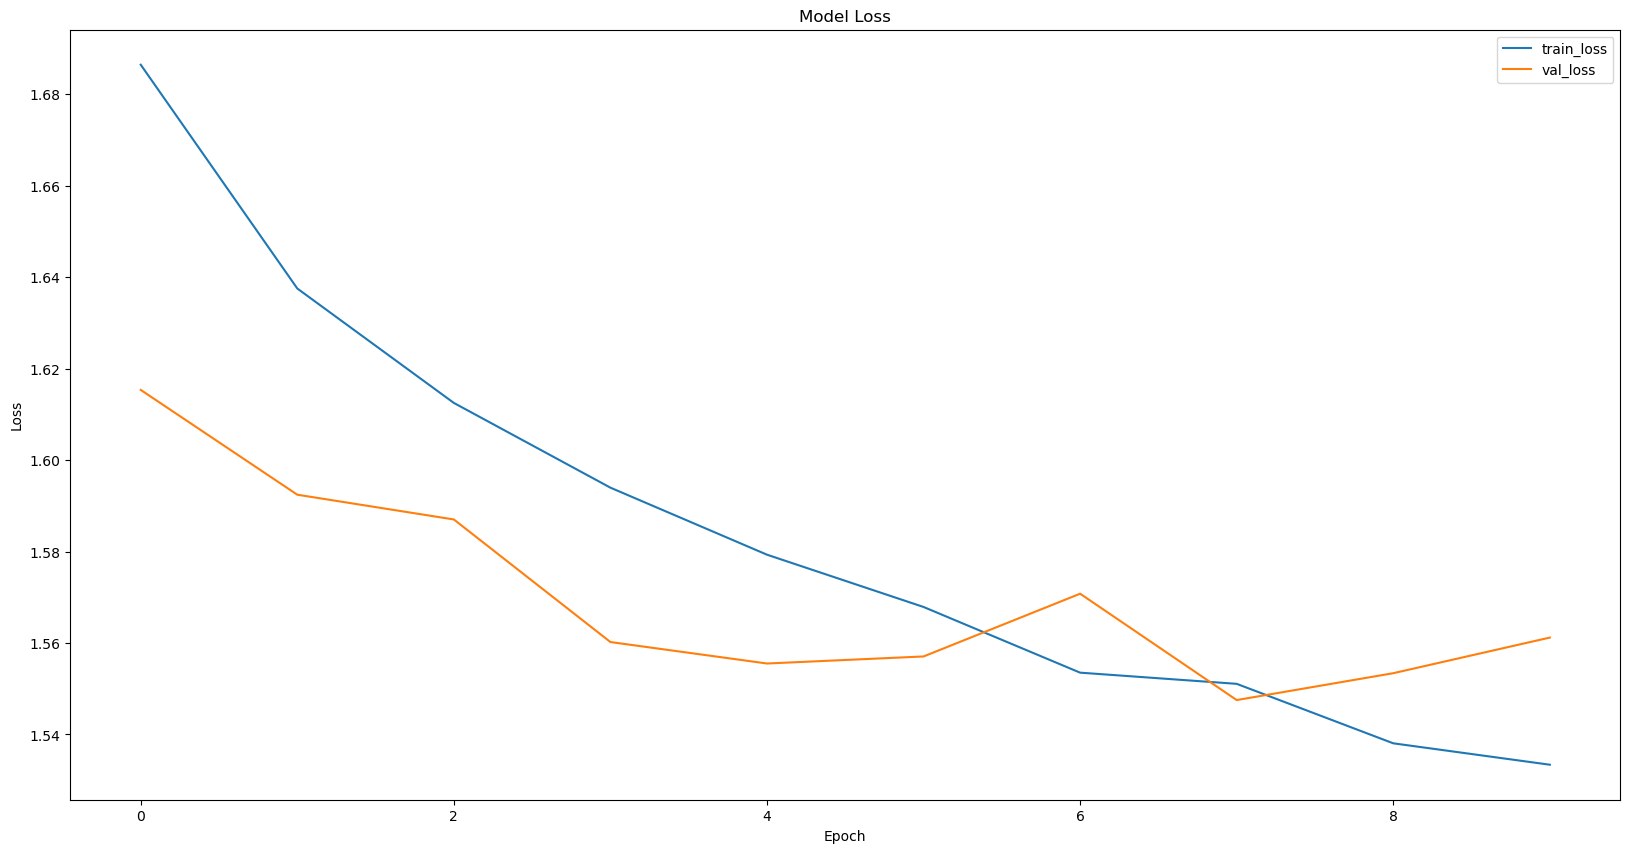

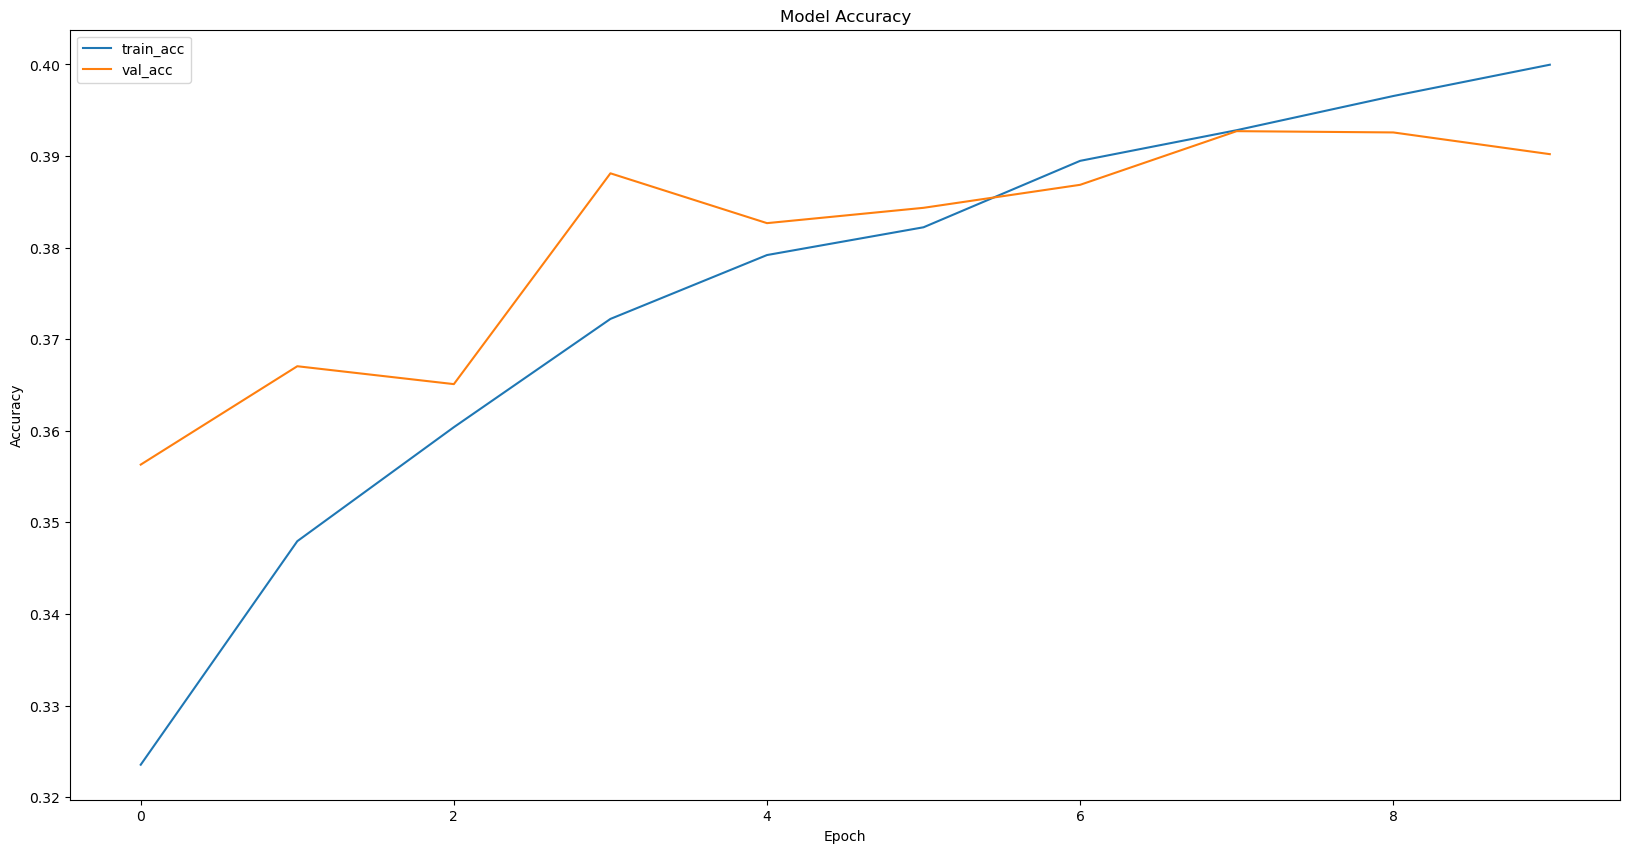

In [55]:
# Plot the training and validation loss
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history3.history['accuracy'], label='train_acc')
plt.plot(history3.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

225/225 [==============================] - 54s 240ms/step


<AxesSubplot:>

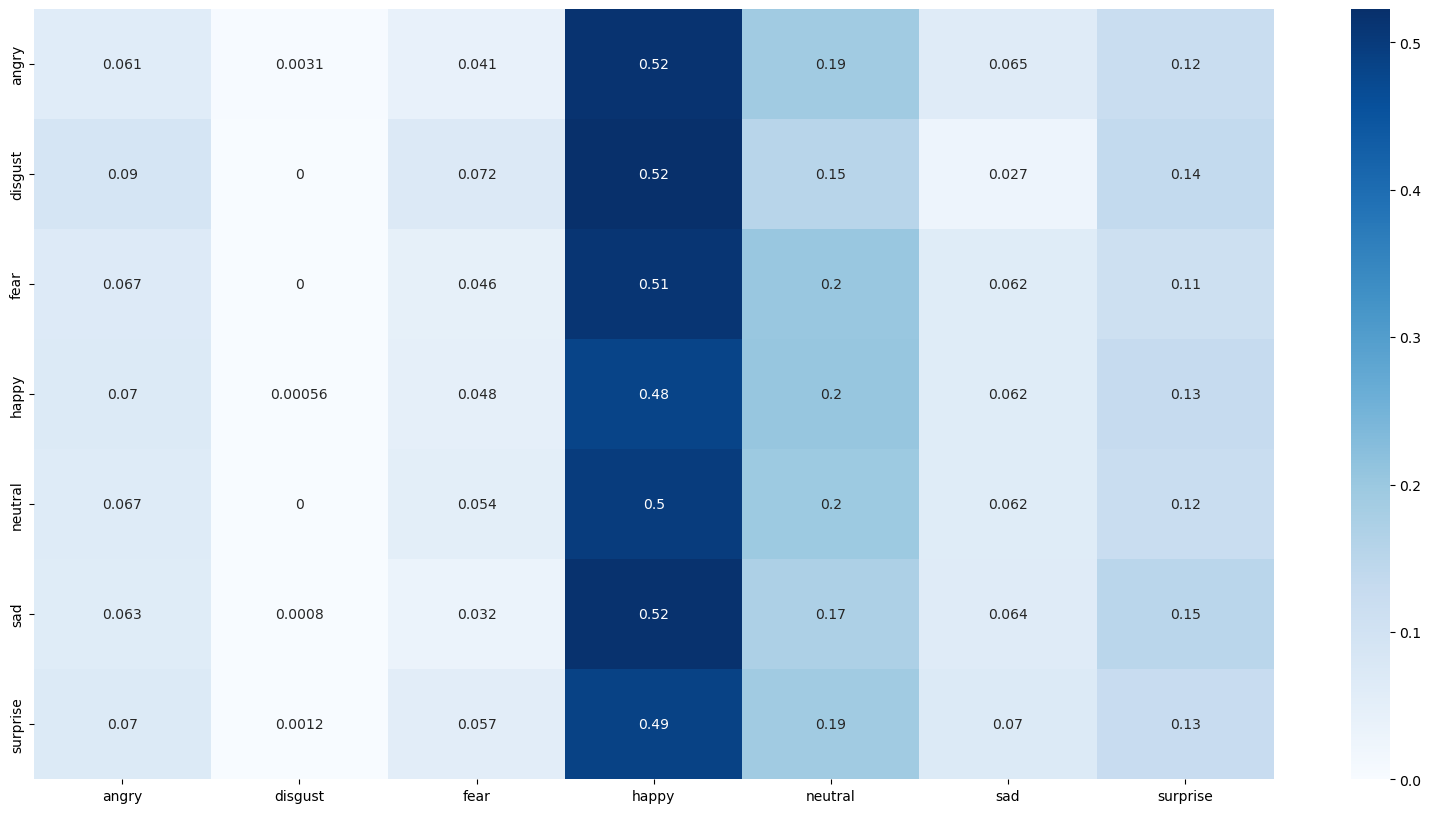

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predictions for the validation set
y_pred = model.predict(validation_generator)

# Get the predicted labels
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Get the class names
class_names = list(validation_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# RESNET + adding Svm classifier in ouput layer 

In [57]:
from tensorflow.keras.models import load_model # a function that allows you to load a pre-trained Keras model
resnet_model = load_model('cnn_model.h5') #to make predictions on new data


In [58]:
#Source: https://github.com/amineHorseman/facial-expression-recognition-svm; ChatGPT4

from sklearn.svm import SVC

# Train an SVM classifier on the features extracted by the model
train_features = model.predict(train_generator)
train_labels = train_generator.classes
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(train_features, train_labels)

# Evaluate the SVM classifier on the validation set
validation_features = model.predict(validation_generator)
validation_labels = validation_generator.classes
accuracy = svm.score(validation_features, validation_labels)
accuracy_train=svm.score(train_features, train_labels)
print('SVM accuracy:',accuracy)
print('SVM accuracy_train:',accuracy_train)                  

225/225 [==============================] - 62s 277ms/step
SVM accuracy: 0.24714405126776262
SVM accuracy_train: 0.2513149186666202


In [66]:
from tensorflow.keras.preprocessing.image import img_to_array #converts a PIL (Python Imaging Library) image instance to a Numpy array
from tensorflow.keras.applications.resnet50 import preprocess_input # applies preprocessing to an input image before it is fed into a pre-trained neural network model


In [72]:
def predict_emotion_and_ei(image_path, ei_neutral_threshold=60, ei_happy_threshold=50, ei_surprised_threshold=60, ei_angry_threshold=20, ei_fear_threshold=30, ei_sad_threshold=30):
    # Load the input image
    img = load_img(image_path, target_size=(48, 48))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Preprocess the image for ResNet50 model
    img_array = preprocess_input(img_array)
    # Add a batch dimension to the image
    img_array = np.expand_dims(img_array, axis=0)
    # Predict the probability distribution of emotions
    predictions = model.predict(img_array)
    # Get the predicted emotion label
    emotion_label = np.argmax(predictions)
    # Define the emotion weights dictionary
    emotion_weights = {'Happy': 0.6, 'Surprised': 0.6, 'Neutral': 0.9, 'Angry': 0.25, 'Fear': 0.3, 'Sad': 0.3}
    if emotion_label == 0:
        emotion_label = 'Happy'
    elif emotion_label == 1:
        emotion_label = 'Sad'
    elif emotion_label == 2:
        emotion_label = 'Neutral'
    elif emotion_label == 3:
        emotion_label = 'Angry'
    elif emotion_label == 4:
        emotion_label = 'Fear'
    elif emotion_label == 5:
        emotion_label = 'Surprised'
    # Compute the engagement index
    ei_neutral = predictions[0][2] * emotion_weights['Neutral'] * 100
    ei_happy = predictions[0][0] * emotion_weights['Happy']
    ei_surprised = predictions[0][5] * emotion_weights['Surprised'] * 100
    ei_angry = predictions[0][3] * emotion_weights['Angry'] * 100
    ei_fear = predictions[0][4] * emotion_weights['Fear'] * 100
    ei_sad = predictions[0][1] * emotion_weights['Sad'] * 100
    
    engagement_index = ei_neutral + ei_happy + ei_surprised + ei_angry + ei_fear + ei_sad
    # Determine the engagement level based on the engagement index and thresholds
    if engagement_index >= ei_neutral_threshold:
        engagement_level = 'Neutral'
    elif engagement_index >= ei_happy_threshold:
        engagement_level = 'Happy'
    elif engagement_index >= ei_surprised_threshold:
        engagement_level = 'Surprised'
    elif engagement_index >= ei_angry_threshold:
        engagement_level = 'Angry'
    elif engagement_index >= ei_fear_threshold:
        engagement_level = 'Fear'
    else:
        engagement_level = 'Sad'
    # Return the predicted emotion label, engagement index, and engagement level
    return emotion_label, engagement_index, engagement_level


In [73]:
from tensorflow.keras.preprocessing.image import load_img #Imports the load_img function from the TensorFlow Keras library
#predicting an emotion label and an engagement index from an image
emotion_label, engagement_index, engagement_level = predict_emotion_and_ei('G:/ml/FER_2013/test/angry/PrivateTest_6420283.jpg', ei_neutral_threshold=70, ei_happy_threshold=60)

#Prints the values of these three variables
print(emotion_label)
print(engagement_index)
print(engagement_level)

1/1 [==============================] - 0s 43ms/step
Neutral
90.00000000005866
Neutral


# References 

1. Set the directory path and looping : https://www.kaggle.com/code/shawon10/ck-facial-expression-detection

2. Facial expression classes and lables : https://www.kaggle.com/code/shawon10/ck-facial-expression-detection

3. Numpy/array categorial conversion to binary values: https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/

4. Model Summary: https://www.tutorialspoint.com/keras/keras_dense_layer.htm

5. FER 2013: https://www.kaggle.com/code/mohamedchahed/human-emotion-detection; https://github.com/pytorch/vision/blob/main/torchvision/datasets/folder.py; ChatGPT4

6. Visualizing losses and accuracy restore history data: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

7. Evaluate the performance of models: https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

8. Confusion Matrix: https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/

9. Developing Inception: #Source: https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/; ChatGPT4

10. VGG19 and CNN for FER: #Source: https://www.kaggle.com/code/enesztrk/facial-emotion-recognition-vgg19-fer2013; ChatCPT4

11. SVM for classification: #Source: https://github.com/amineHorseman/facial-expression-recognition-svm; ChatGPT4
